In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../data/california_housing_train.csv')

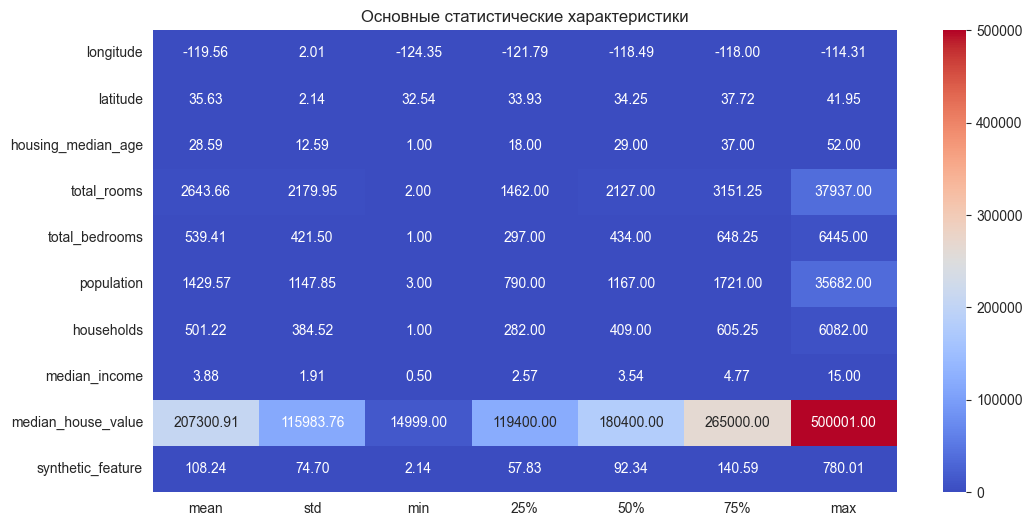

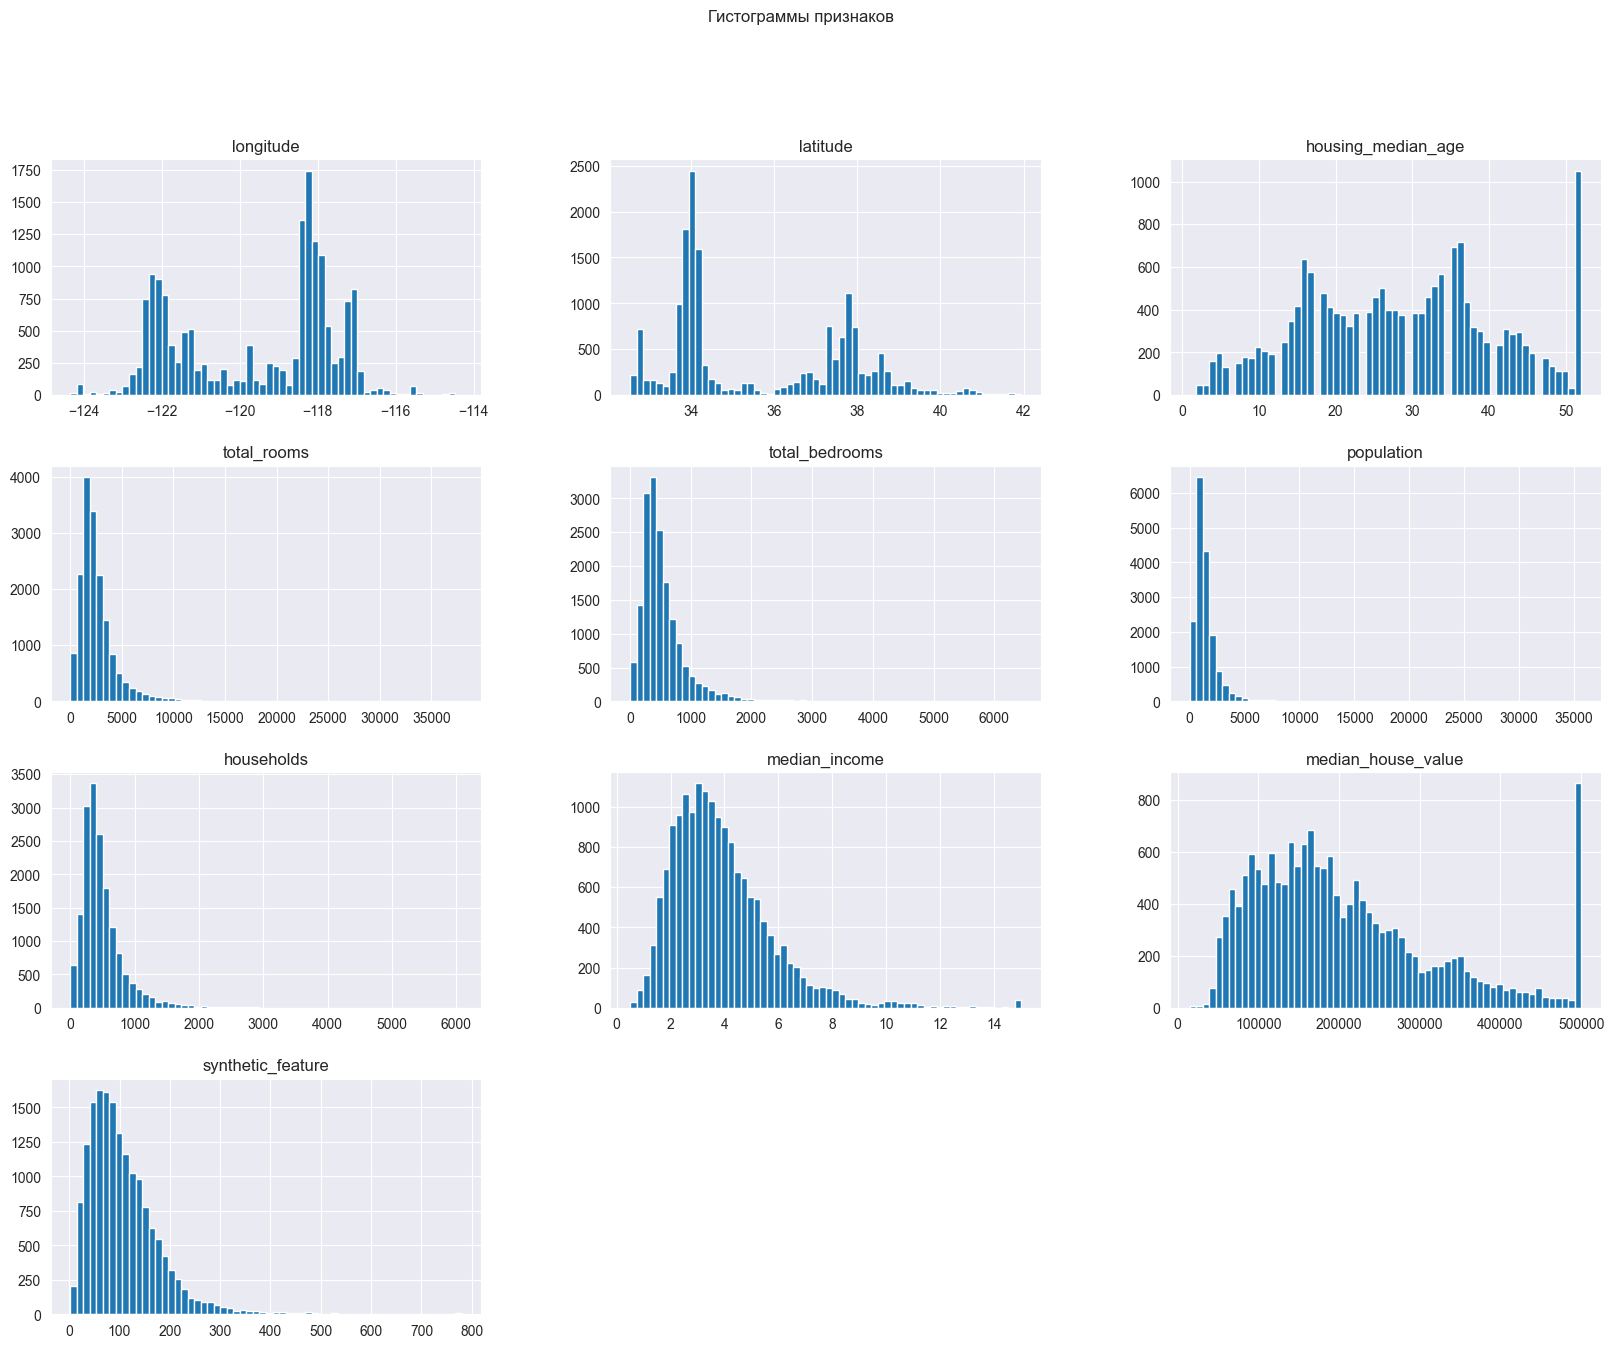

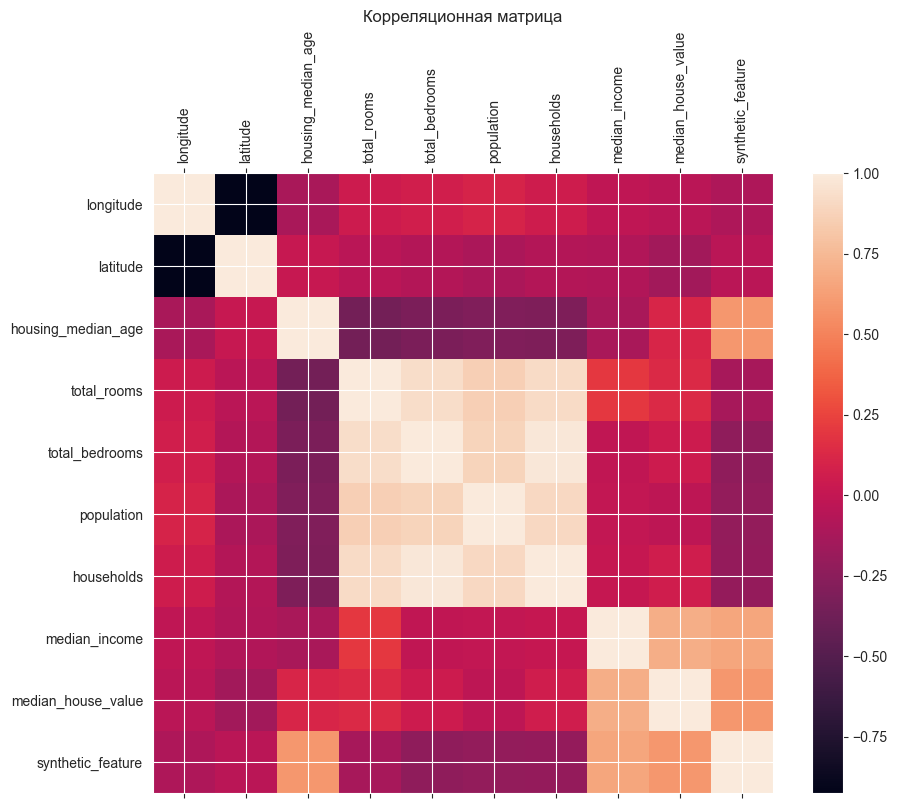

In [37]:
#Визуализация статистики
statistics = data.describe()
plt.figure(figsize=(12, 6))
sns.heatmap(statistics.iloc[1:, :].T, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Основные статистические характеристики')
plt.show()

# Гистограммы по всем признакам
data.hist(bins=60, figsize=(20, 15))
plt.suptitle('Гистограммы признаков')
plt.show()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
plt.matshow(data.corr(), fignum=1)
plt.xticks(range(len(data.columns)), data.columns, rotation=90)
plt.yticks(range(len(data.columns)), data.columns)
plt.colorbar()
plt.title('Корреляционная матрица')
plt.show()

In [21]:
# предварительная обработка данных
print(data.isnull().sum())
data.fillna(data.mean(), inplace=True)
print(data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [22]:
#Кодирование категориальных признаков и нормировка
from sklearn.preprocessing import StandardScaler
features = data.drop('median_house_value', axis=1)
target = data['median_house_value']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454


In [24]:
#разделение данных на обучающие и тестовые наборы
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, test_size=0.2, random_state=42)

print(f'Размер обучающего набора: {X_train.shape}, Размер тестового набора: {X_test.shape}')

Размер обучающего набора: (13600, 8), Размер тестового набора: (3400, 8)


In [33]:
#линейная регрессия с использованием метода наименьших квадратов
import numpy as np

def linear_regression(X_train, y_train):
    X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
    return theta

def predict(X_test, theta):
    X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    return X_b_test.dot(theta)

def r2_score(y_true, y_pred):
    total_variance = sum((y_true - y_true.mean()) ** 2)
    residual_variance = sum((y_true - y_pred) ** 2)
    return 1 - residual_variance / total_variance


In [26]:
# Модель(все признаки)
theta1 = linear_regression(X_train, y_train)
y_pred1 = predict(X_test, theta1)
r2_1 = r2_score(y_test, y_pred1)
print(f'R^2 Score Модель(все признаки): {r2_1:.4f}')

R^2 Score Модель(все признаки): 0.6636


In [27]:
# Модель(два признака)
X_train_2 = X_train[['median_income', 'total_rooms']]
X_test_2 = X_test[['median_income', 'total_rooms']]

theta2 = linear_regression(X_train_2, y_train)
y_pred2 = predict(X_test_2, theta2)
r2_2 = r2_score(y_test, y_pred2)
print(f'R^2 Score Модель(два признака): {r2_2:.4f}')

R^2 Score Модель(два признака): 0.4978


In [28]:
# Модель(один признак)
X_train_3 = X_train[['median_income']]
X_test_3 = X_test[['median_income']]

theta3 = linear_regression(X_train_3, y_train)
y_pred3 = predict(X_test_3, theta3)
r2_3 = r2_score(y_test, y_pred3)
print(f'R^2 Score Модель(один признак): {r2_3:.4f}')

R^2 Score Модель(один признак): 0.4978


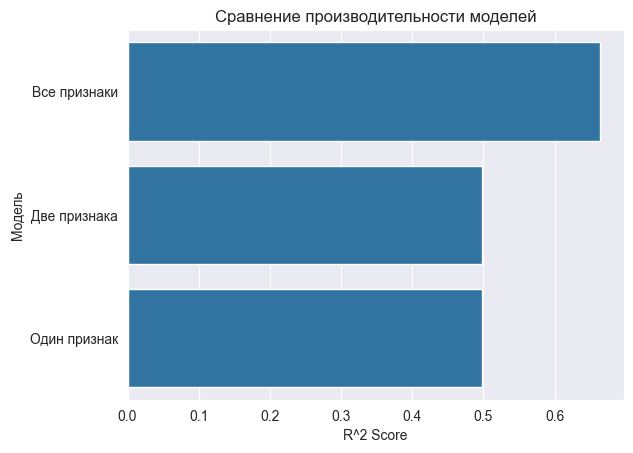

In [30]:
#сравнение результатов
results = pd.DataFrame({
    'Модель': ['Все признаки', 'Две признака', 'Один признак'],
    'R^2 Score': [r2_1, r2_2, r2_3]
})

sns.barplot(x='R^2 Score', y='Модель', data=results)
plt.title('Сравнение производительности моделей')
plt.show()

In [31]:
#ввод синтетического признака
data['synthetic_feature'] = data['median_income'] * data['housing_median_age']
features = data.drop('median_house_value', axis=1)
target = data['median_house_value']
scaled_features = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)
theta_synthetic = linear_regression(X_train, y_train)
y_pred_synthetic = predict(X_test, theta_synthetic)
r2_synthetic = r2_score(y_test, y_pred_synthetic)
print(f'R^2 Score Модели с синтетическим признаком: {r2_synthetic:.4f}')


R^2 Score Модели с синтетическим признаком: 0.6648
